# Vector Databases

## Why Vector Databases?

Vector data are high-dimensional and traditional dbs are not built to efficiently store and retrieve vectors. Because of this: Vector DBs are designed to store and retrieve vector data - (duh). 

## Linear Algebra 101

### Vectors

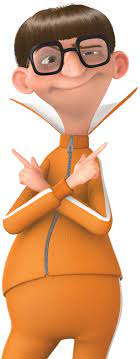

Vector: **Direction + Magnitude**

* collection of numbers
* can represent different things (**embedding**)
    - language
    - images
    - audio
* High School Cliques Analogy
* Applications
    - text generation
    - recommendation systems
    - search engines

### **Embeddings == Vectors**
(but Vector doesn't necessarily mean embedding)

### VectorDB
* used to store/query these embeddings
* arrays of numbers clustered
    - relational db: rows/columns
    - document db: documents/collections


# Simple VectorDB implementation in LangChain

First, we install the necessary packages.

`langchain` is a framework for using anything related utilizing Large Language Models (LLMs).
`sentence-transformers` is required to utilize HuggingFace's Embeddings.
`faiss-cpu`: FAISS is a vector DB that will be used in this tutorial.
`pypdf`: required package for the 'PDFLoader' we will use - used to read text from PDFs.


In [1]:
#!pip install langchain
#!pip install sentence-transformers
#!pip install faiss-cpu
#!pip install pypdf

Now we can import everything we will use.

`PyPDFDirectoryLoader` is a 'document loader', which means it processes a folder with .pdfs and extracts the text from them. All of the different loader formats langchain implementations are here: [LangChain Loaders](https://python.langchain.com/docs/integrations/document_loaders)

`RecursiveCharacterTextSplitter` is a 'text splitter': it takes in 'document loader' text documents and splits the documents in manageable chunks. Chunking is important for several reasons:
1. size limitations of embedding models
2. search precision -> when entire docs encoded as single vectors: specificity of embeddings may decrease
3. memory efficiency -> processing chunks is computationally cheaper than processing whole documents
4. parallel processing -> can process chunks in parallel

`HuggingFaceEmbeddings`: used to generate the embeddings for the text chunks. (natural language -> vector representation) (The default model selected is [`all-mpnet-base-v2`](https://huggingface.co/sentence-transformers/all-mpnet-base-v2)) This is just the example used in this example. There are many ways to generate embeddings (just a few):
* one hot encoding
* word2vec
* GloVe
* BERT (transformer)

`FAISS`: in-memory vector DB used in this tutorial.

In [1]:
import langchain
from langchain.document_loaders import PyPDFDirectoryLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS

In [2]:
# load pdfs using PyPDFDirectoryLoader

loader = PyPDFDirectoryLoader("pdfs/")
docs = loader.load()
len(docs)

58

In [5]:
docs[0]

Document(page_content='Beyond Accuracy: What Data Quality Means to Data Consumers\nAuthor(s): Richard Y. Wang and Diane M. Strong\nSource: Journal of Management Information Systems, Vol. 12, No. 4 (Spring, 1996), pp. 5-33 \nPublished by: M.E. Sharpe, Inc.\nStable URL: http://www.jstor.org/stable/40398176 .\nAccessed: 26/10/2013 17:54\nYour use of the JSTOR archive indicates your acceptance of the Terms & Conditions of Use, available at .\nhttp://www.jstor.org/page/info/about/policies/terms.jsp\n .\nJSTOR is a not-for-profit service that helps scholars, researchers, and students discover, use, and build upon a wide range of\ncontent in a trusted digital archive. We use information technology and tools to increase productivity and facilitate new forms\nof scholarship. For more information about JSTOR, please contact support@jstor.org.\n .\nM.E. Sharpe, Inc. is collaborating with JSTOR to digitize, preserve and extend access to Journal of\nManagement Information Systems.\nhttp://www.jstor

In [11]:
len(docs[0].page_content)

1089

In [3]:
# split text into chunks
# chunk overlap: some text is shared between adjacent chunks
# important for context preservation, continuity in search results, reducing boundary effects

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1024, chunk_overlap=64)
texts = text_splitter.split_documents(docs)
len(texts)

272

In [21]:
# peek at first 'text document'
print(texts[0].page_content)

Beyond Accuracy: What Data Quality Means to Data Consumers
Author(s): Richard Y. Wang and Diane M. Strong
Source: Journal of Management Information Systems, Vol. 12, No. 4 (Spring, 1996), pp. 5-33 
Published by: M.E. Sharpe, Inc.
Stable URL: http://www.jstor.org/stable/40398176 .
Accessed: 26/10/2013 17:54
Your use of the JSTOR archive indicates your acceptance of the Terms & Conditions of Use, available at .
http://www.jstor.org/page/info/about/policies/terms.jsp
 .
JSTOR is a not-for-profit service that helps scholars, researchers, and students discover, use, and build upon a wide range of
content in a trusted digital archive. We use information technology and tools to increase productivity and facilitate new forms
of scholarship. For more information about JSTOR, please contact support@jstor.org.
 .
M.E. Sharpe, Inc. is collaborating with JSTOR to digitize, preserve and extend access to Journal of
Management Information Systems.
http://www.jstor.org


In [16]:
from langchain.embeddings import openai as openai_embeddings

In [22]:
# init embeddings model
# text -> vector

embeddings = HuggingFaceEmbeddings(
    model_name="thenlper/gte-large",
    model_kwargs={"device": "cpu"},
    encode_kwargs={"normalize_embeddings": True},
)

C:\Users\kolton.hauck\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No sentence-transformers model found with name thenlper/gte-large. Creating a new one with MEAN pooling.


SSLError: (MaxRetryError("HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /thenlper/gte-large/resolve/main/config.json (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)')))"), '(Request ID: 1c6fd992-10d2-4371-b6e1-bd4edfd88534)')

In [23]:
# generate embeddings

query_result = embeddings.embed_query(texts[0].page_content)
print(len(query_result))

NameError: name 'embeddings' is not defined